In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

_______

In [85]:
class LinearRegression():
    def __init__(self, n_iter = 900, tol = 0.0001):
        self.n_iter = n_iter
        self.tol = tol
        self.w = None
        
    def _compute_loss(self, X, y):
        if self.w is not None:
            l2_loss = np.sum((y - X@self.w) ** 2)
            return l2_loss
        
    def _grad_loss(self, X, y):
        d_l2_loss = - 2 * (y - X@self.w) @ X
        return d_l2_loss / len(X)
    
    def _add_ones(self, X):
        """
        Adding column of ones.
        """
        return np.vstack((X.T, np.ones(len(X)))).T
    
    def fit(self, X, y):
        X = self._add_ones(X)
        self.w = np.random.randn(X.shape[1])
        for i in range(self.n_iter):
            self.w -= 0.001 * self._grad_loss(X, y)
            if i % 100 ==0:
                plt.figure()
                plt.scatter(X[:, 0], X @ self.w)
                plt.scatter(X[:, 0], y)
                plt.plot()
                
    def predict(self, X):
        X = self._add_ones(X)
        return X @ self.w

In [86]:
X, y = make_regression(n_samples=1000, n_features=2, n_informative=1, random_state=12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
regr = LinearRegression()

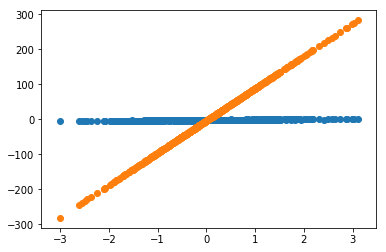

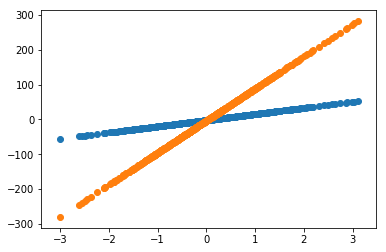

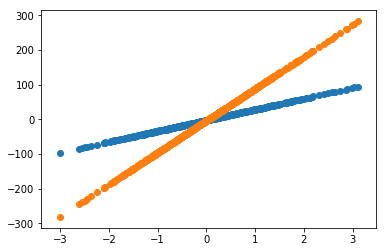

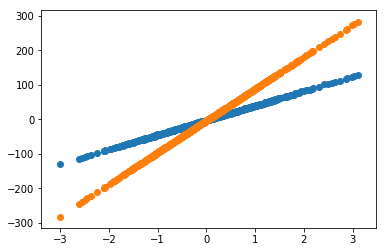

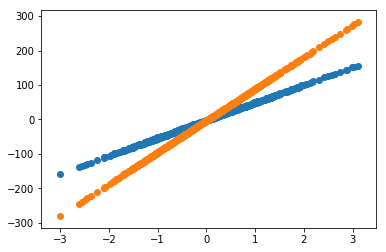

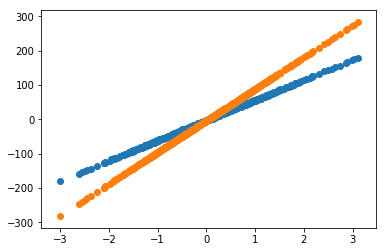

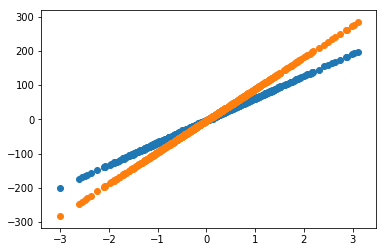

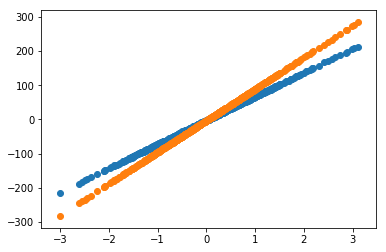

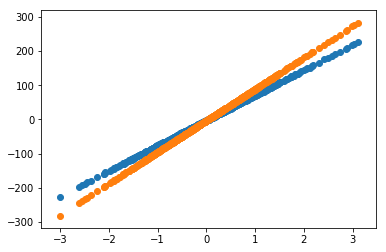

In [89]:
regr.fit(X_train, y_train)

In [90]:
np.sqrt(mean_squared_error(y_test, regr.predict(X_test)))

13.853779540222174

In [91]:
r2_score(y_test, regr.predict(X_test))

0.97348485428481824

In [92]:
regr.w

array([ 77.22308833,  -0.84746694,  -3.54965008])

_______

In [93]:
class LogRegression():
    """
    Multiclass log.regression using ONLY PYTHON.
    """
    def __init__(self, etta=0.01, alpha = 1., n_iter = 100, tol = 0.0001, lambd = 1.0, debug=False):
        """
        Params
        ------
        etta : float
            Learning rate for sgd.
        alpha : float
            Synthetic bias column.
        """
        self.etta = etta
        self.alpha = alpha
        self.n_iter = n_iter
        self.tol = tol
        self.lambd = lambd
        self.debug = debug
    
    def _add_ones(self, X):
        """
        Adding column of ones.
        """
        return np.vstack((X.T, self.alpha * np.ones(len(X)))).T
    
    def _one_hot(self, y):
        n_classes=len(np.unique(y))
        onehot = np.zeros(shape=(y.shape[0], n_classes), dtype='float32')
        onehot[np.arange(y.shape[0]), y] = 1.0
        return onehot
    
    def _normalize(self, X):
        """
        Normalize X by features (from 0 to 1).
        """
        return X / X.max(axis=0)
    
    def _gradient(self, x, y):
        """
        Taking gradient of logloss.
        """
        probs = np.exp(np.dot(self.w, x.T))
        probs /= np.sum(probs, axis=0)
        if len(x.shape)==1:
            der = x[np.newaxis,:].T.dot((probs.T - y)[np.newaxis,:]).T + 2*self.w * self.lambd
        else:
            der = x.T.dot((probs.T - y)).T + 2*self.w * self.lambd
        return der
    
    def _logloss(self, X, y):
        probs = np.exp(np.dot(self.w, X.T)) / np.sum(np.exp(np.dot(self.w, X.T)), axis=0)
        return - np.sum(np.multiply(y.T, np.log(probs)))/len(X) + np.sum(self.w**2) * self.lambd / len(X)
    
    def fit(self, X, y):
        """
        Optimizing categorical cross entropy.
        """
        np.random.seed(20)
        if self.debug: print ('iter, delta, logloss')
        X_new = self._add_ones(X)
        y = self._one_hot(y)
        self.w = np.random.rand(y.shape[1], X_new.shape[1]) # 'num_classes' x 'num_features'
        delta = 100
        counter = 0
        while (delta >= self.tol and counter <= self.n_iter):
            counter += 1
            norm_grad_w = self._gradient(X_new, y) / len(X_new)
#             new_w = np.zeros(self.w.shape)
#             for i,x in enumerate(X_new):
#                 new_w += self._gradient(x, y[i]) / len(X_new)
            delta = np.sum(np.abs(self.etta * norm_grad_w))
            self.w -= self.etta * norm_grad_w
            if self.debug and counter % 5 == 0:
                print (counter, delta, self._logloss(X_new, y))
    
    def predict_proba(self, X):    
        """
        Predicting probabilities.
        """
        X_new = self._add_ones(X)
        probs = np.exp(np.dot(self.w, X_new.T)) / np.sum(np.exp(np.dot(self.w, X_new.T)), axis=0) 
        return probs.T

In [94]:
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer, r2_score, mean_squared_error

In [95]:
X, y = make_classification(n_samples=1000, n_classes=2, n_informative=14, random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
clf = LogRegression(n_iter=500)

In [97]:
clf.fit(X_train, y_train)

In [98]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.85072811059907827

# ! когда используем регуляризацию - нужно приводить признаки к одной шкале

_____

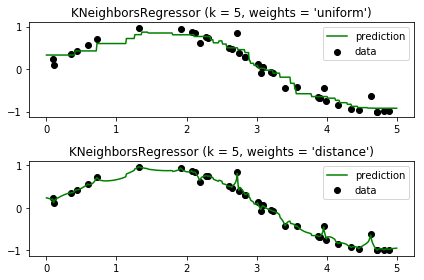

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
    
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

_______

In [99]:
def compute_giny_impurity(y, y_unique):
    s=0
    if len(y):
        for i in y_unique:
            s += ( np.sum(y==i) / len(y) )**2
    return 1-s

def compute_information_gain(X, y, col, tresh):
    mask_right = X[:, col] >= tresh
    mask_left = ~mask_right
    y_unq = np.unique(y)
    imp = compute_giny_impurity(y, y_unq)
    imp_r = compute_giny_impurity(y[mask_right], y_unq)
    imp_l = compute_giny_impurity(y[~mask_right], y_unq)
    fr_r = np.sum(mask_right) / len(mask_right)
    fr_l = np.sum(mask_left) / len(mask_left)
    return imp - fr_r * imp_r - fr_l * imp_l

In [100]:
class Tree(object):
    def __init__(self, depth=5):
        self.depth = depth
        self.splitter = {'col': None, 'treshold':None}
        self.left_chld = None
        self.right_chld = None
        self.ans = None
    
    def fit(self, X, y):
        if not len(X): return
        # TODO min samples to split.
        split = self.find_best_split(X, y)
        self.splitter = {'col': split[0], 'treshold':split[1]}
        print (self.depth, self.splitter)
        
        if self.depth > 1:
            mask = X[:, self.splitter['col']] >= self.splitter['treshold']
            self.left_chld = Tree(depth=self.depth-1)
            self.left_chld.fit(X[mask], y[mask])
            self.right_chld = Tree(depth=self.depth-1)
            self.right_chld.fit(X[~mask], y[~mask])
        else:
            self.ans = np.mean(y)
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        mask = X[:, self.splitter['col']] >= self.splitter['treshold']
        if len(mask):
            y[mask] = self.left_chld.predict(X[mask]) if self.left_chld else self.ans
            y[~mask] = self.right_chld.predict(X[~mask]) if self.right_chld else self.ans
            return y
    
    def find_best_split(self, X, y):
        cols = X.shape[1]
        best_ = []
        for i in range(cols): # overhead! ne need to compute it every time
            col = i
            vals = X[:, col]
            unq_vals = np.unique(vals)
            for val in unq_vals:
                score_ = compute_information_gain(X, y, col, val)
                if len(best_):
                    if best_[2] < score_:
                        best_ = [col, val, score_]
                else:
                    best_ = [col, val, score_]
                # print(col, val, compute_information_gain(X, y, col, val))
        return best_
        

In [101]:
X, y = make_classification(n_samples=1000, n_classes=2, n_informative=14, random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
tr = Tree(depth=4)
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
print (roc_auc_score(y_test, y_pred))

4 {'treshold': 0.38158442862375785, 'col': 15}
3 {'treshold': 1.6445028207616017, 'col': 11}
2 {'treshold': -11.939901004027169, 'col': 14}
1 {'treshold': -4.2881401211122343, 'col': 0}
1 {'treshold': 1.5326189044959997, 'col': 0}
2 {'treshold': -0.56993190008844885, 'col': 17}
1 {'treshold': -1.8121772927271205, 'col': 6}
1 {'treshold': -4.5828820385942253, 'col': 6}
3 {'treshold': -0.75212426369858076, 'col': 2}
2 {'treshold': -4.0735090927723752, 'col': 17}
1 {'treshold': 3.687926576473743, 'col': 11}
1 {'treshold': -3.6815721860406705, 'col': 0}
2 {'treshold': -1.6503859490663499, 'col': 16}
1 {'treshold': -2.6596459781884949, 'col': 8}
1 {'treshold': -2.2285242956421221, 'col': 3}
0.740516129032


In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
tr = DecisionTreeClassifier(max_depth=4)
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
print (roc_auc_score(y_test, y_pred))

0.744884792627
